In [8]:
import numpy as np

import polyscope as ps

# Initialize polyscope
ps.init()

In [3]:
# input vertice idx, return (uvw) in tuple
v2coor = {
    0:(0, 1, 0),
    1:(1, 1, 0),
    2:(1, 0, 0),
    3:(0, 0, 0),
    4:(0, 1, 1),
    5:(1, 1, 1),
    6:(1, 0, 1),
    7:(0, 0, 1)
}

# decode edge to get the adjacent vertices idx
edge2v = {
    0:(0, 1),
    1:(1, 2),
    2:(2, 3),
    3:(0, 3),
    4:(4, 5),
    5:(5, 6),
    6:(6, 7),
    7:(4, 7),
    8:(4, 0),
    9:(1, 5),
    10:(2, 6),
    11:(3, 7)
}

#Build Marching Cubes Lookup table
#This table is straight from Paul Bourke's site (Source: http://paulbourke.net/geometry/polygonise/)

triTable =[
            [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [0, 8, 3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [0, 1, 9, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [1, 8, 3, 9, 8, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [1, 2, 10, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [0, 8, 3, 1, 2, 10, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [9, 2, 10, 0, 2, 9, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [2, 8, 3, 2, 10, 8, 10, 9, 8, -1, -1, -1, -1, -1, -1, -1],
            [3, 11, 2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [0, 11, 2, 8, 11, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [1, 9, 0, 2, 3, 11, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [1, 11, 2, 1, 9, 11, 9, 8, 11, -1, -1, -1, -1, -1, -1, -1],
            [3, 10, 1, 11, 10, 3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [0, 10, 1, 0, 8, 10, 8, 11, 10, -1, -1, -1, -1, -1, -1, -1],
            [3, 9, 0, 3, 11, 9, 11, 10, 9, -1, -1, -1, -1, -1, -1, -1],
            [9, 8, 10, 10, 8, 11, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [4, 7, 8, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [4, 3, 0, 7, 3, 4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [0, 1, 9, 8, 4, 7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [4, 1, 9, 4, 7, 1, 7, 3, 1, -1, -1, -1, -1, -1, -1, -1],
            [1, 2, 10, 8, 4, 7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [3, 4, 7, 3, 0, 4, 1, 2, 10, -1, -1, -1, -1, -1, -1, -1],
            [9, 2, 10, 9, 0, 2, 8, 4, 7, -1, -1, -1, -1, -1, -1, -1],
            [2, 10, 9, 2, 9, 7, 2, 7, 3, 7, 9, 4, -1, -1, -1, -1],
            [8, 4, 7, 3, 11, 2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [11, 4, 7, 11, 2, 4, 2, 0, 4, -1, -1, -1, -1, -1, -1, -1],
            [9, 0, 1, 8, 4, 7, 2, 3, 11, -1, -1, -1, -1, -1, -1, -1],
            [4, 7, 11, 9, 4, 11, 9, 11, 2, 9, 2, 1, -1, -1, -1, -1],
            [3, 10, 1, 3, 11, 10, 7, 8, 4, -1, -1, -1, -1, -1, -1, -1],
            [1, 11, 10, 1, 4, 11, 1, 0, 4, 7, 11, 4, -1, -1, -1, -1],
            [4, 7, 8, 9, 0, 11, 9, 11, 10, 11, 0, 3, -1, -1, -1, -1],
            [4, 7, 11, 4, 11, 9, 9, 11, 10, -1, -1, -1, -1, -1, -1, -1],
            [9, 5, 4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [9, 5, 4, 0, 8, 3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [0, 5, 4, 1, 5, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [8, 5, 4, 8, 3, 5, 3, 1, 5, -1, -1, -1, -1, -1, -1, -1],
            [1, 2, 10, 9, 5, 4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [3, 0, 8, 1, 2, 10, 4, 9, 5, -1, -1, -1, -1, -1, -1, -1],
            [5, 2, 10, 5, 4, 2, 4, 0, 2, -1, -1, -1, -1, -1, -1, -1],
            [2, 10, 5, 3, 2, 5, 3, 5, 4, 3, 4, 8, -1, -1, -1, -1],
            [9, 5, 4, 2, 3, 11, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [0, 11, 2, 0, 8, 11, 4, 9, 5, -1, -1, -1, -1, -1, -1, -1],
            [0, 5, 4, 0, 1, 5, 2, 3, 11, -1, -1, -1, -1, -1, -1, -1],
            [2, 1, 5, 2, 5, 8, 2, 8, 11, 4, 8, 5, -1, -1, -1, -1],
            [10, 3, 11, 10, 1, 3, 9, 5, 4, -1, -1, -1, -1, -1, -1, -1],
            [4, 9, 5, 0, 8, 1, 8, 10, 1, 8, 11, 10, -1, -1, -1, -1],
            [5, 4, 0, 5, 0, 11, 5, 11, 10, 11, 0, 3, -1, -1, -1, -1],
            [5, 4, 8, 5, 8, 10, 10, 8, 11, -1, -1, -1, -1, -1, -1, -1],
            [9, 7, 8, 5, 7, 9, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [9, 3, 0, 9, 5, 3, 5, 7, 3, -1, -1, -1, -1, -1, -1, -1],
            [0, 7, 8, 0, 1, 7, 1, 5, 7, -1, -1, -1, -1, -1, -1, -1],
            [1, 5, 3, 3, 5, 7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [9, 7, 8, 9, 5, 7, 10, 1, 2, -1, -1, -1, -1, -1, -1, -1],
            [10, 1, 2, 9, 5, 0, 5, 3, 0, 5, 7, 3, -1, -1, -1, -1],
            [8, 0, 2, 8, 2, 5, 8, 5, 7, 10, 5, 2, -1, -1, -1, -1],
            [2, 10, 5, 2, 5, 3, 3, 5, 7, -1, -1, -1, -1, -1, -1, -1],
            [7, 9, 5, 7, 8, 9, 3, 11, 2, -1, -1, -1, -1, -1, -1, -1],
            [9, 5, 7, 9, 7, 2, 9, 2, 0, 2, 7, 11, -1, -1, -1, -1],
            [2, 3, 11, 0, 1, 8, 1, 7, 8, 1, 5, 7, -1, -1, -1, -1],
            [11, 2, 1, 11, 1, 7, 7, 1, 5, -1, -1, -1, -1, -1, -1, -1],
            [9, 5, 8, 8, 5, 7, 10, 1, 3, 10, 3, 11, -1, -1, -1, -1],
            [5, 7, 0, 5, 0, 9, 7, 11, 0, 1, 0, 10, 11, 10, 0, -1],
            [11, 10, 0, 11, 0, 3, 10, 5, 0, 8, 0, 7, 5, 7, 0, -1],
            [11, 10, 5, 7, 11, 5, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [10, 6, 5, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [0, 8, 3, 5, 10, 6, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [9, 0, 1, 5, 10, 6, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [1, 8, 3, 1, 9, 8, 5, 10, 6, -1, -1, -1, -1, -1, -1, -1],
            [1, 6, 5, 2, 6, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [1, 6, 5, 1, 2, 6, 3, 0, 8, -1, -1, -1, -1, -1, -1, -1],
            [9, 6, 5, 9, 0, 6, 0, 2, 6, -1, -1, -1, -1, -1, -1, -1],
            [5, 9, 8, 5, 8, 2, 5, 2, 6, 3, 2, 8, -1, -1, -1, -1],
            [2, 3, 11, 10, 6, 5, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [11, 0, 8, 11, 2, 0, 10, 6, 5, -1, -1, -1, -1, -1, -1, -1],
            [0, 1, 9, 2, 3, 11, 5, 10, 6, -1, -1, -1, -1, -1, -1, -1],
            [5, 10, 6, 1, 9, 2, 9, 11, 2, 9, 8, 11, -1, -1, -1, -1],
            [6, 3, 11, 6, 5, 3, 5, 1, 3, -1, -1, -1, -1, -1, -1, -1],
            [0, 8, 11, 0, 11, 5, 0, 5, 1, 5, 11, 6, -1, -1, -1, -1],
            [3, 11, 6, 0, 3, 6, 0, 6, 5, 0, 5, 9, -1, -1, -1, -1],
            [6, 5, 9, 6, 9, 11, 11, 9, 8, -1, -1, -1, -1, -1, -1, -1],
            [5, 10, 6, 4, 7, 8, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [4, 3, 0, 4, 7, 3, 6, 5, 10, -1, -1, -1, -1, -1, -1, -1],
            [1, 9, 0, 5, 10, 6, 8, 4, 7, -1, -1, -1, -1, -1, -1, -1],
            [10, 6, 5, 1, 9, 7, 1, 7, 3, 7, 9, 4, -1, -1, -1, -1],
            [6, 1, 2, 6, 5, 1, 4, 7, 8, -1, -1, -1, -1, -1, -1, -1],
            [1, 2, 5, 5, 2, 6, 3, 0, 4, 3, 4, 7, -1, -1, -1, -1],
            [8, 4, 7, 9, 0, 5, 0, 6, 5, 0, 2, 6, -1, -1, -1, -1],
            [7, 3, 9, 7, 9, 4, 3, 2, 9, 5, 9, 6, 2, 6, 9, -1],
            [3, 11, 2, 7, 8, 4, 10, 6, 5, -1, -1, -1, -1, -1, -1, -1],
            [5, 10, 6, 4, 7, 2, 4, 2, 0, 2, 7, 11, -1, -1, -1, -1],
            [0, 1, 9, 4, 7, 8, 2, 3, 11, 5, 10, 6, -1, -1, -1, -1],
            [9, 2, 1, 9, 11, 2, 9, 4, 11, 7, 11, 4, 5, 10, 6, -1],
            [8, 4, 7, 3, 11, 5, 3, 5, 1, 5, 11, 6, -1, -1, -1, -1],
            [5, 1, 11, 5, 11, 6, 1, 0, 11, 7, 11, 4, 0, 4, 11, -1],
            [0, 5, 9, 0, 6, 5, 0, 3, 6, 11, 6, 3, 8, 4, 7, -1],
            [6, 5, 9, 6, 9, 11, 4, 7, 9, 7, 11, 9, -1, -1, -1, -1],
            [10, 4, 9, 6, 4, 10, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [4, 10, 6, 4, 9, 10, 0, 8, 3, -1, -1, -1, -1, -1, -1, -1],
            [10, 0, 1, 10, 6, 0, 6, 4, 0, -1, -1, -1, -1, -1, -1, -1],
            [8, 3, 1, 8, 1, 6, 8, 6, 4, 6, 1, 10, -1, -1, -1, -1],
            [1, 4, 9, 1, 2, 4, 2, 6, 4, -1, -1, -1, -1, -1, -1, -1],
            [3, 0, 8, 1, 2, 9, 2, 4, 9, 2, 6, 4, -1, -1, -1, -1],
            [0, 2, 4, 4, 2, 6, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [8, 3, 2, 8, 2, 4, 4, 2, 6, -1, -1, -1, -1, -1, -1, -1],
            [10, 4, 9, 10, 6, 4, 11, 2, 3, -1, -1, -1, -1, -1, -1, -1],
            [0, 8, 2, 2, 8, 11, 4, 9, 10, 4, 10, 6, -1, -1, -1, -1],
            [3, 11, 2, 0, 1, 6, 0, 6, 4, 6, 1, 10, -1, -1, -1, -1],
            [6, 4, 1, 6, 1, 10, 4, 8, 1, 2, 1, 11, 8, 11, 1, -1],
            [9, 6, 4, 9, 3, 6, 9, 1, 3, 11, 6, 3, -1, -1, -1, -1],
            [8, 11, 1, 8, 1, 0, 11, 6, 1, 9, 1, 4, 6, 4, 1, -1],
            [3, 11, 6, 3, 6, 0, 0, 6, 4, -1, -1, -1, -1, -1, -1, -1],
            [6, 4, 8, 11, 6, 8, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [7, 10, 6, 7, 8, 10, 8, 9, 10, -1, -1, -1, -1, -1, -1, -1],
            [0, 7, 3, 0, 10, 7, 0, 9, 10, 6, 7, 10, -1, -1, -1, -1],
            [10, 6, 7, 1, 10, 7, 1, 7, 8, 1, 8, 0, -1, -1, -1, -1],
            [10, 6, 7, 10, 7, 1, 1, 7, 3, -1, -1, -1, -1, -1, -1, -1],
            [1, 2, 6, 1, 6, 8, 1, 8, 9, 8, 6, 7, -1, -1, -1, -1],
            [2, 6, 9, 2, 9, 1, 6, 7, 9, 0, 9, 3, 7, 3, 9, -1],
            [7, 8, 0, 7, 0, 6, 6, 0, 2, -1, -1, -1, -1, -1, -1, -1],
            [7, 3, 2, 6, 7, 2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [2, 3, 11, 10, 6, 8, 10, 8, 9, 8, 6, 7, -1, -1, -1, -1],
            [2, 0, 7, 2, 7, 11, 0, 9, 7, 6, 7, 10, 9, 10, 7, -1],
            [1, 8, 0, 1, 7, 8, 1, 10, 7, 6, 7, 10, 2, 3, 11, -1],
            [11, 2, 1, 11, 1, 7, 10, 6, 1, 6, 7, 1, -1, -1, -1, -1],
            [8, 9, 6, 8, 6, 7, 9, 1, 6, 11, 6, 3, 1, 3, 6, -1],
            [0, 9, 1, 11, 6, 7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [7, 8, 0, 7, 0, 6, 3, 11, 0, 11, 6, 0, -1, -1, -1, -1],
            [7, 11, 6, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [7, 6, 11, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [3, 0, 8, 11, 7, 6, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [0, 1, 9, 11, 7, 6, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [8, 1, 9, 8, 3, 1, 11, 7, 6, -1, -1, -1, -1, -1, -1, -1],
            [10, 1, 2, 6, 11, 7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [1, 2, 10, 3, 0, 8, 6, 11, 7, -1, -1, -1, -1, -1, -1, -1],
            [2, 9, 0, 2, 10, 9, 6, 11, 7, -1, -1, -1, -1, -1, -1, -1],
            [6, 11, 7, 2, 10, 3, 10, 8, 3, 10, 9, 8, -1, -1, -1, -1],
            [7, 2, 3, 6, 2, 7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [7, 0, 8, 7, 6, 0, 6, 2, 0, -1, -1, -1, -1, -1, -1, -1],
            [2, 7, 6, 2, 3, 7, 0, 1, 9, -1, -1, -1, -1, -1, -1, -1],
            [1, 6, 2, 1, 8, 6, 1, 9, 8, 8, 7, 6, -1, -1, -1, -1],
            [10, 7, 6, 10, 1, 7, 1, 3, 7, -1, -1, -1, -1, -1, -1, -1],
            [10, 7, 6, 1, 7, 10, 1, 8, 7, 1, 0, 8, -1, -1, -1, -1],
            [0, 3, 7, 0, 7, 10, 0, 10, 9, 6, 10, 7, -1, -1, -1, -1],
            [7, 6, 10, 7, 10, 8, 8, 10, 9, -1, -1, -1, -1, -1, -1, -1],
            [6, 8, 4, 11, 8, 6, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [3, 6, 11, 3, 0, 6, 0, 4, 6, -1, -1, -1, -1, -1, -1, -1],
            [8, 6, 11, 8, 4, 6, 9, 0, 1, -1, -1, -1, -1, -1, -1, -1],
            [9, 4, 6, 9, 6, 3, 9, 3, 1, 11, 3, 6, -1, -1, -1, -1],
            [6, 8, 4, 6, 11, 8, 2, 10, 1, -1, -1, -1, -1, -1, -1, -1],
            [1, 2, 10, 3, 0, 11, 0, 6, 11, 0, 4, 6, -1, -1, -1, -1],
            [4, 11, 8, 4, 6, 11, 0, 2, 9, 2, 10, 9, -1, -1, -1, -1],
            [10, 9, 3, 10, 3, 2, 9, 4, 3, 11, 3, 6, 4, 6, 3, -1],
            [8, 2, 3, 8, 4, 2, 4, 6, 2, -1, -1, -1, -1, -1, -1, -1],
            [0, 4, 2, 4, 6, 2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [1, 9, 0, 2, 3, 4, 2, 4, 6, 4, 3, 8, -1, -1, -1, -1],
            [1, 9, 4, 1, 4, 2, 2, 4, 6, -1, -1, -1, -1, -1, -1, -1],
            [8, 1, 3, 8, 6, 1, 8, 4, 6, 6, 10, 1, -1, -1, -1, -1],
            [10, 1, 0, 10, 0, 6, 6, 0, 4, -1, -1, -1, -1, -1, -1, -1],
            [4, 6, 3, 4, 3, 8, 6, 10, 3, 0, 3, 9, 10, 9, 3, -1],
            [10, 9, 4, 6, 10, 4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [4, 9, 5, 7, 6, 11, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [0, 8, 3, 4, 9, 5, 11, 7, 6, -1, -1, -1, -1, -1, -1, -1],
            [5, 0, 1, 5, 4, 0, 7, 6, 11, -1, -1, -1, -1, -1, -1, -1],
            [11, 7, 6, 8, 3, 4, 3, 5, 4, 3, 1, 5, -1, -1, -1, -1],
            [9, 5, 4, 10, 1, 2, 7, 6, 11, -1, -1, -1, -1, -1, -1, -1],
            [6, 11, 7, 1, 2, 10, 0, 8, 3, 4, 9, 5, -1, -1, -1, -1],
            [7, 6, 11, 5, 4, 10, 4, 2, 10, 4, 0, 2, -1, -1, -1, -1],
            [3, 4, 8, 3, 5, 4, 3, 2, 5, 10, 5, 2, 11, 7, 6, -1],
            [7, 2, 3, 7, 6, 2, 5, 4, 9, -1, -1, -1, -1, -1, -1, -1],
            [9, 5, 4, 0, 8, 6, 0, 6, 2, 6, 8, 7, -1, -1, -1, -1],
            [3, 6, 2, 3, 7, 6, 1, 5, 0, 5, 4, 0, -1, -1, -1, -1],
            [6, 2, 8, 6, 8, 7, 2, 1, 8, 4, 8, 5, 1, 5, 8, -1],
            [9, 5, 4, 10, 1, 6, 1, 7, 6, 1, 3, 7, -1, -1, -1, -1],
            [1, 6, 10, 1, 7, 6, 1, 0, 7, 8, 7, 0, 9, 5, 4, -1],
            [4, 0, 10, 4, 10, 5, 0, 3, 10, 6, 10, 7, 3, 7, 10, -1],
            [7, 6, 10, 7, 10, 8, 5, 4, 10, 4, 8, 10, -1, -1, -1, -1],
            [6, 9, 5, 6, 11, 9, 11, 8, 9, -1, -1, -1, -1, -1, -1, -1],
            [3, 6, 11, 0, 6, 3, 0, 5, 6, 0, 9, 5, -1, -1, -1, -1],
            [0, 11, 8, 0, 5, 11, 0, 1, 5, 5, 6, 11, -1, -1, -1, -1],
            [6, 11, 3, 6, 3, 5, 5, 3, 1, -1, -1, -1, -1, -1, -1, -1],
            [1, 2, 10, 9, 5, 11, 9, 11, 8, 11, 5, 6, -1, -1, -1, -1],
            [0, 11, 3, 0, 6, 11, 0, 9, 6, 5, 6, 9, 1, 2, 10, -1],
            [11, 8, 5, 11, 5, 6, 8, 0, 5, 10, 5, 2, 0, 2, 5, -1],
            [6, 11, 3, 6, 3, 5, 2, 10, 3, 10, 5, 3, -1, -1, -1, -1],
            [5, 8, 9, 5, 2, 8, 5, 6, 2, 3, 8, 2, -1, -1, -1, -1],
            [9, 5, 6, 9, 6, 0, 0, 6, 2, -1, -1, -1, -1, -1, -1, -1],
            [1, 5, 8, 1, 8, 0, 5, 6, 8, 3, 8, 2, 6, 2, 8, -1],
            [1, 5, 6, 2, 1, 6, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [1, 3, 6, 1, 6, 10, 3, 8, 6, 5, 6, 9, 8, 9, 6, -1],
            [10, 1, 0, 10, 0, 6, 9, 5, 0, 5, 6, 0, -1, -1, -1, -1],
            [0, 3, 8, 5, 6, 10, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [10, 5, 6, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [11, 5, 10, 7, 5, 11, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [11, 5, 10, 11, 7, 5, 8, 3, 0, -1, -1, -1, -1, -1, -1, -1],
            [5, 11, 7, 5, 10, 11, 1, 9, 0, -1, -1, -1, -1, -1, -1, -1],
            [10, 7, 5, 10, 11, 7, 9, 8, 1, 8, 3, 1, -1, -1, -1, -1],
            [11, 1, 2, 11, 7, 1, 7, 5, 1, -1, -1, -1, -1, -1, -1, -1],
            [0, 8, 3, 1, 2, 7, 1, 7, 5, 7, 2, 11, -1, -1, -1, -1],
            [9, 7, 5, 9, 2, 7, 9, 0, 2, 2, 11, 7, -1, -1, -1, -1],
            [7, 5, 2, 7, 2, 11, 5, 9, 2, 3, 2, 8, 9, 8, 2, -1],
            [2, 5, 10, 2, 3, 5, 3, 7, 5, -1, -1, -1, -1, -1, -1, -1],
            [8, 2, 0, 8, 5, 2, 8, 7, 5, 10, 2, 5, -1, -1, -1, -1],
            [9, 0, 1, 5, 10, 3, 5, 3, 7, 3, 10, 2, -1, -1, -1, -1],
            [9, 8, 2, 9, 2, 1, 8, 7, 2, 10, 2, 5, 7, 5, 2, -1],
            [1, 3, 5, 3, 7, 5, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [0, 8, 7, 0, 7, 1, 1, 7, 5, -1, -1, -1, -1, -1, -1, -1],
            [9, 0, 3, 9, 3, 5, 5, 3, 7, -1, -1, -1, -1, -1, -1, -1],
            [9, 8, 7, 5, 9, 7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [5, 8, 4, 5, 10, 8, 10, 11, 8, -1, -1, -1, -1, -1, -1, -1],
            [5, 0, 4, 5, 11, 0, 5, 10, 11, 11, 3, 0, -1, -1, -1, -1],
            [0, 1, 9, 8, 4, 10, 8, 10, 11, 10, 4, 5, -1, -1, -1, -1],
            [10, 11, 4, 10, 4, 5, 11, 3, 4, 9, 4, 1, 3, 1, 4, -1],
            [2, 5, 1, 2, 8, 5, 2, 11, 8, 4, 5, 8, -1, -1, -1, -1],
            [0, 4, 11, 0, 11, 3, 4, 5, 11, 2, 11, 1, 5, 1, 11, -1],
            [0, 2, 5, 0, 5, 9, 2, 11, 5, 4, 5, 8, 11, 8, 5, -1],
            [9, 4, 5, 2, 11, 3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [2, 5, 10, 3, 5, 2, 3, 4, 5, 3, 8, 4, -1, -1, -1, -1],
            [5, 10, 2, 5, 2, 4, 4, 2, 0, -1, -1, -1, -1, -1, -1, -1],
            [3, 10, 2, 3, 5, 10, 3, 8, 5, 4, 5, 8, 0, 1, 9, -1],
            [5, 10, 2, 5, 2, 4, 1, 9, 2, 9, 4, 2, -1, -1, -1, -1],
            [8, 4, 5, 8, 5, 3, 3, 5, 1, -1, -1, -1, -1, -1, -1, -1],
            [0, 4, 5, 1, 0, 5, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [8, 4, 5, 8, 5, 3, 9, 0, 5, 0, 3, 5, -1, -1, -1, -1],
            [9, 4, 5, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [4, 11, 7, 4, 9, 11, 9, 10, 11, -1, -1, -1, -1, -1, -1, -1],
            [0, 8, 3, 4, 9, 7, 9, 11, 7, 9, 10, 11, -1, -1, -1, -1],
            [1, 10, 11, 1, 11, 4, 1, 4, 0, 7, 4, 11, -1, -1, -1, -1],
            [3, 1, 4, 3, 4, 8, 1, 10, 4, 7, 4, 11, 10, 11, 4, -1],
            [4, 11, 7, 9, 11, 4, 9, 2, 11, 9, 1, 2, -1, -1, -1, -1],
            [9, 7, 4, 9, 11, 7, 9, 1, 11, 2, 11, 1, 0, 8, 3, -1],
            [11, 7, 4, 11, 4, 2, 2, 4, 0, -1, -1, -1, -1, -1, -1, -1],
            [11, 7, 4, 11, 4, 2, 8, 3, 4, 3, 2, 4, -1, -1, -1, -1],
            [2, 9, 10, 2, 7, 9, 2, 3, 7, 7, 4, 9, -1, -1, -1, -1],
            [9, 10, 7, 9, 7, 4, 10, 2, 7, 8, 7, 0, 2, 0, 7, -1],
            [3, 7, 10, 3, 10, 2, 7, 4, 10, 1, 10, 0, 4, 0, 10, -1],
            [1, 10, 2, 8, 7, 4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [4, 9, 1, 4, 1, 7, 7, 1, 3, -1, -1, -1, -1, -1, -1, -1],
            [4, 9, 1, 4, 1, 7, 0, 8, 1, 8, 7, 1, -1, -1, -1, -1],
            [4, 0, 3, 7, 4, 3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [4, 8, 7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [9, 10, 8, 10, 11, 8, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [3, 0, 9, 3, 9, 11, 11, 9, 10, -1, -1, -1, -1, -1, -1, -1],
            [0, 1, 10, 0, 10, 8, 8, 10, 11, -1, -1, -1, -1, -1, -1, -1],
            [3, 1, 10, 11, 3, 10, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [1, 2, 11, 1, 11, 9, 9, 11, 8, -1, -1, -1, -1, -1, -1, -1],
            [3, 0, 9, 3, 9, 11, 1, 2, 9, 2, 11, 9, -1, -1, -1, -1],
            [0, 2, 11, 8, 0, 11, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [3, 2, 11, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [2, 3, 8, 2, 8, 10, 10, 8, 9, -1, -1, -1, -1, -1, -1, -1],
            [9, 10, 2, 0, 9, 2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [2, 3, 8, 2, 8, 10, 0, 1, 8, 1, 10, 8, -1, -1, -1, -1],
            [1, 10, 2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [1, 3, 8, 9, 1, 8, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [0, 9, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [0, 3, 8, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
            [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]];

In [9]:
# point clouds for visualization
def constructPointCloud(N):
    point_clouds = np.zeros([N**3, 3])
    count = 0
    for i in range(N):
        for j in range(N):
            for k in range(N):
                point_clouds[count] = np.array([i, j, k], dtype=float)
                count+=1
    return point_clouds

In [47]:
# ps.register_point_cloud("my points", constructPointCloud(32))

In [25]:
class MC():
    def __init__(self, triTable, edge2v, v2coor):
        self.vertices = []
        self.faces = []
        self.d = {}
        self.size = 0
        self.triTable = triTable
        self.edge2v = edge2v
        self.v2coor = v2coor
        self.size = 0
    def interpolate(self, e):
        #midpoint for now
        v1, v2 = self.edge2v[e]
        return (np.array(self.v2coor[v1], dtype=float) + np.array(self.v2coor[v2], dtype=float))/2
    def cubeMesh(self, val, origin):
        tri = self.triTable[val]
        v_new = []
        for e in tri:
            if e==-1:
                break
            v_new.append(self.interpolate(e)+origin)
        for v in v_new: # add now vertices to list
            if v.tobytes() not in self.d.keys():
                self.d[v.tobytes()] = self.size
                self.size += 1
                self.vertices.append(v)
        k = 0
        while(tri[k]!=-1):
            f = self.d[v_new[k].tobytes()], self.d[v_new[k+1].tobytes()], self.d[v_new[k+2].tobytes()]
            self.faces.append(f)
            k += 3
    def getVal(self, f, origin):
        s = 0
        for i, loc in self.v2coor.items():
            if f(np.array(loc, dtype=float)+origin) > 0:
                s += 1 << i
        return s
    def cubeMeshF(self, f, origin):
        val = self.getVal(f, origin)
        #print(bin(val))
        self.cubeMesh(val, origin)
    def show(self, ps):
        ps.register_surface_mesh("my mesh", np.r_[self.vertices], np.array(self.faces), smooth_shade=True)
        ps.show()
    def isosurface(self, N, f):
        for i in range(N-1):
            for j in range(N-1):
                for k in range(N-1):
                    self.cubeMeshF(f, np.array([i, j, k], dtype=float))

In [21]:
s1 = sphere_f(2, [3, 3, 3])
s2 = sphere_f(3, [5, 5, 5])
def doubleball(loc):
    return max(s1(loc), s2(loc))

In [6]:
def sphere_f(R, center):
    def sphere(loc):
        return R**2 -((loc[0]-center[0])**2 + (loc[1]-center[1])**2 + (loc[2]-center[2])**2)
    return sphere

In [28]:
def surface1(loc):
    return (loc[0]/32-0.5)**2 + (loc[1]/32-0.5)**2 - (loc[2]/32-0.5)**2

In [49]:
def goursat_tangle_f(loc):
    x, y, z = loc[0], loc[1], loc[2]
    a,b,c = 0.0,-5.0,11.8
    x, y, z = (x - 64) / 20, (y - 64) / 20, (z - 64) / 20
    return x**4+y**4+z**4+a*(x**2+y**2+z**2)**2+b*(x**2+y**2+z**2)+c

In [ ]:
# reconstruct and show the goursat surface
mc = MC(triTable, edge2v, v2coor)
mc.isosurface(128, goursat_tangle_f)
mc.show(ps)

In [30]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
def plot_implicit(fn, bbox=(-2.5,2.5)):
    ''' create a plot of an implicit function
    fn  ...implicit function (plot where fn==0)
    bbox ..the x,y,and z limits of plotted interval'''
    xmin, xmax, ymin, ymax, zmin, zmax = bbox*3
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    A = np.linspace(xmin, xmax, 100) # resolution of the contour
    B = np.linspace(xmin, xmax, 15) # number of slices
    A1,A2 = np.meshgrid(A,A) # grid on which the contour is plotted

    for z in B: # plot contours in the XY plane
        X,Y = A1,A2
        Z = fn(X,Y,z)
        cset = ax.contour(X, Y, Z+z, [z], zdir='z')
        # [z] defines the only level to plot for this contour for this value of z

    for y in B: # plot contours in the XZ plane
        X,Z = A1,A2
        Y = fn(X,y,Z)
        cset = ax.contour(X, Y+y, Z, [y], zdir='y')

    for x in B: # plot contours in the YZ plane
        Y,Z = A1,A2
        X = fn(x,Y,Z)
        cset = ax.contour(X+x, Y, Z, [x], zdir='x')

    # must set plot limits because the contour will likely extend
    # way beyond the displayed level.  Otherwise matplotlib extends the plot limits
    # to encompass all values in the contour.
    ax.set_zlim3d(zmin,zmax)
    ax.set_xlim3d(xmin,xmax)
    ax.set_ylim3d(ymin,ymax)

    plt.show()

In [31]:
def goursat_tangle(x,y,z):
    a,b,c = 0.0,-5.0,11.8
    return x**4+y**4+z**4+a*(x**2+y**2+z**2)**2+b*(x**2+y**2+z**2)+c
def sphere(x, y, z):
    return ((x-1.5)**2 + (y-1.5)**2 + (z-1.5)**2) - 2

def sphere_f(loc):
    return -sphere(loc[0], loc[1], loc[2])

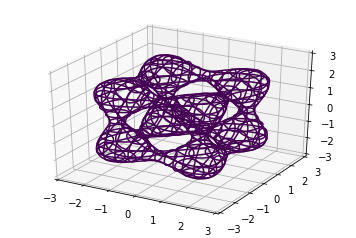

In [48]:
# verify the implementation is correct
plot_implicit(goursat_tangle, bbox = (-3, 3))